In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("dark")

import nltk
import re

df = pd.read_csv('../data/lyrics2.csv')

In [6]:
df['genre'] = df['genre'].str.title()
df['genre'].value_counts(normalize=True)*100

Rock       31.126482
Pop        25.444664
Country    24.407115
Hip Hop    19.021739
Name: genre, dtype: float64

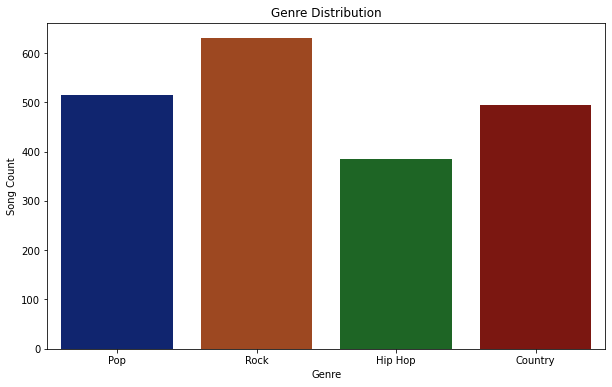

In [7]:
# visualize genre counts
plt.figure(figsize=(10, 6))
sns.countplot(x='genre', data=df)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Song Count');


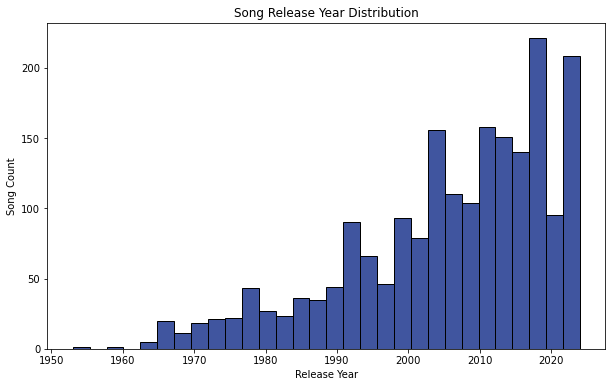

In [8]:
# visualize song count by release year
plt.figure(figsize=(10, 6))
sns.histplot(x='release_year', data=df, bins=30)
plt.title('Song Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Song Count');

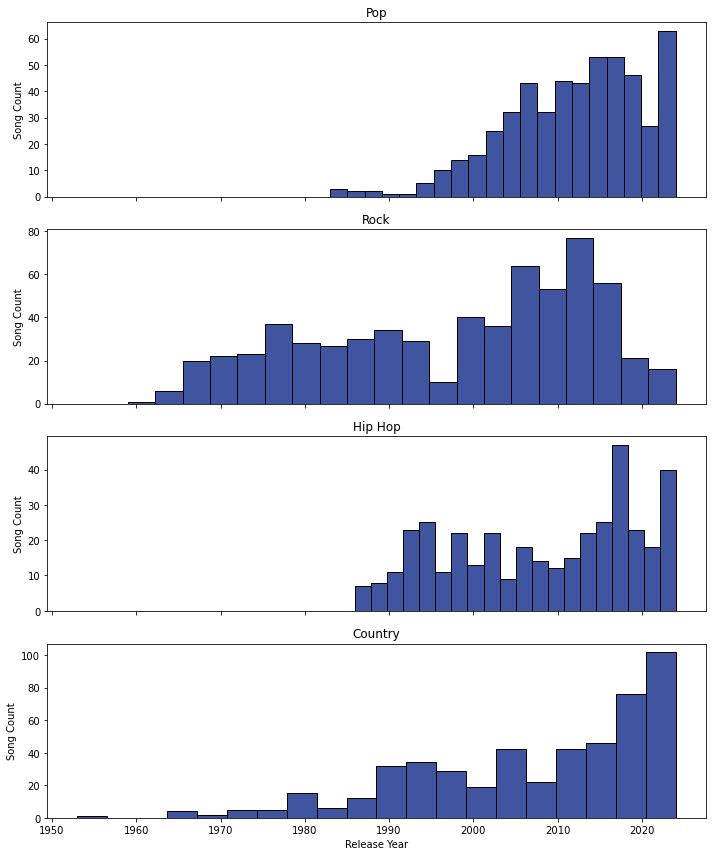

In [9]:
# break out release year by genre
fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=True)
genres = df['genre'].unique()
for i, genre in enumerate(genres):
    sns.histplot(x='release_year', data=df[df['genre']==genre], bins=20, ax=axes[i])
    axes[i].set_title(genre)
    axes[i].set_xlabel('Release Year')
    axes[i].set_ylabel('Song Count')
plt.tight_layout();

<Figure size 720x576 with 0 Axes>

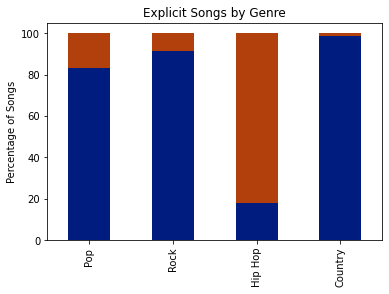

In [11]:
# explicit songs by genre - calculate percentage
df_explicit = (df.groupby('genre')['explicit']
               .value_counts(normalize=True).unstack()
               .loc[['Pop', 'Rock', 'Hip Hop', 'Country']]*100)

plt.figure(figsize=(10, 8))
df_explicit.plot(kind='bar', stacked=True, legend=False)
plt.title('Explicit Songs by Genre')
plt.xlabel(None)
plt.ylabel('Percentage of Songs')
plt.show()

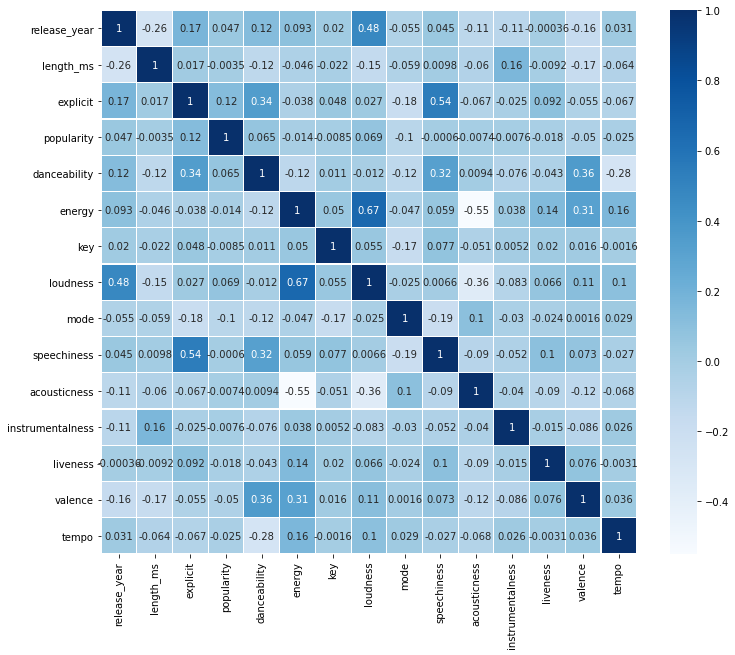

In [12]:
# correlation for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='Blues', linewidths=0.1);